In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import xarray as xr
from dateutil.relativedelta import relativedelta


from my_functions import read_obsfcstana_extend_datetime
from my_functions import read_obsfcstana

In [2]:
expt_name = 'DAv7_M36_SMAP_ASCAT_up13'

start_date = datetime(2016, 1, 1)
end_date = datetime(2016, 4, 1)

start_date_str = start_date.strftime('%Y%m%d')
end_date_str = end_date.strftime('%Y%m%d')

# filename = f"{start_date_str}_{end_date_str}.npz"

In [3]:
# Produce with extended date_time
# Define the list of years
years = [str(year) for year in range(start_date.year, end_date.year + 1)]
print('years = ', years)

# Define the common file name start
file_name_start = expt_name+'.ens_avg.ldas_ObsFcstAna.20'

# Define the print flag
printflag = False

# Define the list of paths
paths = []
for month in range(1, 4):
    path = f'/discover/nobackup/amfox/Experiments/snow_da_3m/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M{month:02d}'
    paths.append(path)

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_fcst_list = []
obs_ana_list = []

# Loop over the paths for the current year
for path in paths:
    # Print the current path
    print("Current path:", path)

    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_fcst_list.append(obs_fcst)
    obs_ana_list.append(obs_ana)

# Combine the returned values from all paths
date_time_out = np.concatenate(date_times)
obs_species_out = np.concatenate(obs_species_list)
obs_tilenum_out = np.concatenate(obs_tilenum_list)
obs_lon_out = np.concatenate(obs_lon_list)
obs_lat_out = np.concatenate(obs_lat_list)
obs_obs_out = np.concatenate(obs_obs_list)
obs_fcst_out = np.concatenate(obs_fcst_list)
obs_ana_out = np.concatenate(obs_ana_list)

# Save the returned values to a file including the current year in the file name
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2016.npz',
            date_time=date_time_out,
            obs_species=obs_species_out,
            obs_tilenum=obs_tilenum_out,
            obs_lon=obs_lon_out,
            obs_lat=obs_lat_out,
            obs_obs=obs_obs_out,
            obs_fcst=obs_fcst_out,
            obs_ana=obs_ana_out)

years =  ['2016']
Current path: /discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M01
Current path: /discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M02
Current path: /discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M03


In [4]:
# Calculate the daily statistics in observation space

# Define the path directory
path_dir = f'/discover/nobackup/amfox/Experiments/snow_da_3m/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = f'{expt_name}.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
dates_list = []

ascat_obs_obs_count_list = []
ascat_obs_obs_mean_list = []
ascat_obs_fcst_mean_list = []
ascat_obs_ana_mean_list = []
ascat_omf_mean_list = []
ascat_oma_mean_list = []
ascat_omf_max_list = []
ascat_omf_std_list = []
ascat_oma_std_list = []

smap_obs_obs_count_list = []
smap_obs_obs_mean_list = []
smap_obs_fcst_mean_list = []
smap_obs_ana_mean_list = []
smap_omf_mean_list = []
smap_oma_mean_list = []
smap_omf_max_list = []
smap_omf_std_list = []
smap_oma_std_list = []

# Define the start and end dates
# start_date = datetime.strptime('20150401', '%Y%m%d')
# end_date = datetime.strptime('20210331', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-4:] == '0401':
        print('file_name = ', file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    a_obs_obs = np.array(obs_obs[obs_species > 4])
    a_obs_fcst = np.array(obs_fcst[obs_species > 4])
    a_obs_ana = np.array(obs_ana[obs_species > 4])
    
    # Calculate the mean values for the variables
    obs_obs_count = len(a_obs_obs)
    obs_obs_mean = np.mean(a_obs_obs)
    obs_fcst_mean = np.mean(a_obs_fcst)
    obs_ana_mean = np.mean(a_obs_ana)
    omf_mean = np.mean(a_obs_obs - a_obs_fcst)
    oma_mean = np.mean(a_obs_obs - a_obs_ana)
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if a_obs_fcst.size > 0 and a_obs_obs.size > 0 and a_obs_fcst.shape == a_obs_obs.shape:
        omf_max = np.max(abs(a_obs_obs - a_obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(a_obs_obs - a_obs_fcst)
    oma_std = np.std(a_obs_obs - a_obs_ana)

    # Append the mean values to the lists
    ascat_obs_obs_count_list.append(obs_obs_count)
    ascat_obs_obs_mean_list.append(obs_obs_mean)
    ascat_obs_fcst_mean_list.append(obs_fcst_mean)
    ascat_obs_ana_mean_list.append(obs_ana_mean)
    ascat_omf_mean_list.append(omf_mean)
    ascat_oma_mean_list.append(oma_mean)
    ascat_omf_max_list.append(omf_max)
    ascat_omf_std_list.append(omf_std)
    ascat_oma_std_list.append(oma_std)
    
    # Repeat for the SMAP obs
    # Convert the lists to numpy arrays
    s_obs_obs = np.array(obs_obs[obs_species < 5])
    s_obs_fcst = np.array(obs_fcst[obs_species < 5])
    s_obs_ana = np.array(obs_ana[obs_species < 5])
    
    # Calculate the mean values for the variables
    obs_obs_count = len(s_obs_obs)
    obs_obs_mean = np.mean(s_obs_obs)
    obs_fcst_mean = np.mean(s_obs_fcst)
    obs_ana_mean = np.mean(s_obs_ana)
    omf_mean = np.mean(s_obs_obs - s_obs_fcst)
    oma_mean = np.mean(s_obs_obs - s_obs_ana)
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if s_obs_fcst.size > 0 and s_obs_obs.size > 0 and s_obs_fcst.shape == s_obs_obs.shape:
        omf_max = np.max(abs(s_obs_obs - s_obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(s_obs_obs - s_obs_fcst)
    oma_std = np.std(s_obs_obs - s_obs_ana)

    # Append the mean values to the lists
    smap_obs_obs_count_list.append(obs_obs_count)
    smap_obs_obs_mean_list.append(obs_obs_mean)
    smap_obs_fcst_mean_list.append(obs_fcst_mean)
    smap_obs_ana_mean_list.append(obs_ana_mean)
    smap_omf_mean_list.append(omf_mean)
    smap_oma_mean_list.append(oma_mean)
    smap_omf_max_list.append(omf_max)
    smap_omf_std_list.append(omf_std)
    smap_oma_std_list.append(oma_std)    
        
    # Append the current date to the dates list
    dates_list.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

file_name =  DAv7_M36_SMAP_ASCAT_up13.ens_avg.ldas_ObsFcstAna.20160401


In [5]:
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_OmF_ts.npz',
         dates_list=dates_list,
         
         ascat_obs_obs_count_list=ascat_obs_obs_count_list,
         ascat_obs_obs_mean_list=ascat_obs_obs_mean_list,
         ascat_obs_fcst_mean_list=ascat_obs_fcst_mean_list,
         ascat_obs_ana_mean_list=ascat_obs_ana_mean_list,
         ascat_omf_mean_list=ascat_omf_mean_list,
         ascat_oma_mean_list=ascat_oma_mean_list,
         ascat_omf_max_list=ascat_omf_max_list,
         ascat_omf_std_list=ascat_omf_std_list,
         ascat_oma_std_list=ascat_oma_std_list,
        
         smap_obs_obs_count_list=smap_obs_obs_count_list,
         smap_obs_obs_mean_list=smap_obs_obs_mean_list,
         smap_obs_fcst_mean_list=smap_obs_fcst_mean_list,
         smap_obs_ana_mean_list=smap_obs_ana_mean_list,
         smap_omf_mean_list=smap_omf_mean_list,
         smap_oma_mean_list=smap_oma_mean_list,
         smap_omf_max_list=smap_omf_max_list,
         smap_omf_std_list=smap_omf_std_list,
         smap_oma_std_list=smap_oma_std_list) 

In [6]:
root_directory = f'/discover/nobackup/amfox/Experiments/snow_da_3m/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg'

sm_surface_list = []
sm_rootzone_list = []
sm_profile_list = []
precipitation_total_surface_flux_list = []
vegetation_greenness_fraction_list = []
leaf_area_index_list = []
time_stamp_list = []
snow_mass_list = []

current_date = start_date

while current_date <= end_date:
    year_month_directory = os.path.join(root_directory, 
                                        f"Y{current_date.year}", 
                                        f"M{current_date.month:02d}")
    print(year_month_directory)
    for filename in sorted(os.listdir(year_month_directory)):
        if filename.endswith('.nc4') and not filename.endswith('z.nc4') and filename.startswith(f'{expt_name}.SMAP_L4_SM_gph.2'):
            file_path = os.path.join(year_month_directory, filename)
            if current_date.year == 2018 and current_date.month == 5:
                print(file_path)
            
            ds = xr.open_dataset(file_path)
            
            # Extract time_stamp
            time_stamp = ds['time_stamp']
            
            sm_surface = ds['sm_surface']
            sm_rootzone = ds['sm_rootzone']
            sm_profile = ds['sm_profile']
            precipitation_total_surface_flux = ds['precipitation_total_surface_flux']
            vegetation_greenness_fraction = ds['vegetation_greenness_fraction']
            leaf_area_index = ds['leaf_area_index']
            snow_mass = ds['snow_mass']
                       
            time_stamp_list.append(time_stamp)    
            sm_surface_list.append(sm_surface)
            sm_rootzone_list.append(sm_rootzone)
            sm_profile_list.append(sm_profile)
            precipitation_total_surface_flux_list.append(precipitation_total_surface_flux)
            vegetation_greenness_fraction_list.append(vegetation_greenness_fraction)
            leaf_area_index_list.append(leaf_area_index)
            snow_mass_list.append(snow_mass)

            ds.close()
    current_date += relativedelta(months=1)

/discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01
/discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M02
/discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M03
/discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M04


In [7]:
# Concatenate the sfmc_increment values along the time dimension
print('working on sm_surface_concat')
sm_surface_concat = xr.concat(sm_surface_list, dim='time')
print('working on sm_rootzone_concat')
sm_rootzone_concat = xr.concat(sm_rootzone_list, dim='time')
print('working on sm_profile_concat')
sm_profile_concat = xr.concat(sm_profile_list, dim='time')
print('working on precipitation_total_surface_flux_concat')
precipitation_total_surface_flux_concat = xr.concat(precipitation_total_surface_flux_list, dim='time')
print('working on vegetation_greenness_fraction_concat')
vegetation_greenness_fraction_concat = xr.concat(vegetation_greenness_fraction_list, dim='time')
print('working on leaf_area_index_concat')
leaf_area_index_concat = xr.concat(leaf_area_index_list, dim='time')
print('working on snow_mass')
snow_mass_concat = xr.concat(snow_mass_list, dim='time')
print('working on time_stamp_concat')
time_stamp_concat = xr.concat(time_stamp_list, dim='time')

working on sm_surface_concat
working on sm_rootzone_concat
working on sm_profile_concat
working on precipitation_total_surface_flux_concat
working on vegetation_greenness_fraction_concat
working on leaf_area_index_concat
working on snow_mass
working on time_stamp_concat


In [8]:
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_SMAP_L4_SM_gph_concat.npz',
         sm_surface_concat=sm_surface_concat,
         sm_rootzone_concat=sm_rootzone_concat,
         sm_profile_concat=sm_profile_concat,
         precipitation_total_surface_flux_concat=precipitation_total_surface_flux_concat,
         vegetation_greenness_fraction_concat=vegetation_greenness_fraction_concat,
         leaf_area_index_concat=leaf_area_index_concat,
         snow_mass_concat=snow_mass_concat,
         time_stamp_concat=time_stamp_concat)

In [9]:
# Calculate the mean, etc  for each tile along the time dimension
mean_sm_surface = []
std_sm_surface = []
mean_sm_rootzone = []
std_sm_rootzone = []
mean_sm_profile = []
std_sm_profile = []
mean_precipitation_total_surface_flux = []
mean_vegetation_greenness_fraction = []
max_vegetation_greenness_fraction = []
mean_leaf_area_index = []
max_leaf_area_index = []
mean_snow_mass_index = []
std_snow_mass_index = []
max_snow_mass_index = []

for i in range(len(sm_surface_concat['tile'])):
    mean_sm_surface.append(np.mean(sm_surface_concat[:, i]))
    std_sm_surface.append(np.std(sm_surface_concat[:, i]))
    mean_sm_rootzone.append(np.mean(sm_rootzone_concat[:, i]))
    std_sm_rootzone.append(np.std(sm_rootzone_concat[:, i]))
    mean_sm_profile.append(np.mean(sm_profile_concat[:, i]))
    std_sm_profile.append(np.std(sm_profile_concat[:, i]))
    mean_precipitation_total_surface_flux.append(np.mean(precipitation_total_surface_flux_concat[:, i]))
    mean_vegetation_greenness_fraction.append(np.mean(vegetation_greenness_fraction_concat[:, i]))
    max_vegetation_greenness_fraction.append(np.max(vegetation_greenness_fraction_concat[:, i]))
    mean_leaf_area_index.append(np.mean(leaf_area_index_concat[:, i]))
    max_leaf_area_index.append(np.max(leaf_area_index_concat[:, i]))
    mean_snow_mass_index.append(np.mean(snow_mass_concat[:, i]))
    std_snow_mass_index.append(np.std(snow_mass_concat[:, i]))
    max_snow_mass_index.append(np.max(snow_mass_concat[:, i]))

In [10]:
# Save both the concatenated sfmc_increment and rzmc_increment values to a new npsavez file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_SMAP_L4_SM_gph_stats.npz', 
         mean_sm_surface=mean_sm_surface,
         std_sm_surface=std_sm_surface,
         mean_sm_rootzone=mean_sm_rootzone,
         std_sm_rootzone=std_sm_rootzone,
         mean_sm_profile=mean_sm_profile,
         std_sm_profile=std_sm_profile,
         mean_precipitation_total_surface_flux=mean_precipitation_total_surface_flux,
         mean_vegetation_greenness_fraction=mean_vegetation_greenness_fraction,
         max_vegetation_greenness_fraction=max_vegetation_greenness_fraction,
         mean_leaf_area_index=mean_leaf_area_index,
         max_leaf_area_index=max_leaf_area_index,
         mean_snow_mass_index=mean_snow_mass_index,
         std_snow_mass_index=std_snow_mass_index,
         max_snow_mass_index=max_snow_mass_index)

In [11]:
# Calculate the mean, etc for each time step along the tile dimension
ts_mean_sm_surface = []
ts_std_sm_surface = []
ts_mean_sm_rootzone = []
ts_std_sm_rootzone = []
ts_mean_sm_profile = []
ts_std_sm_profile = []
ts_mean_precipitation_total_surface_flux = []
ts_mean_vegetation_greenness_fraction = []
ts_max_vegetation_greenness_fraction = []
ts_mean_leaf_area_index = []
ts_max_leaf_area_index = []
ts_mean_snow_mass_index = []
ts_std_snow_mass_index = []
ts_max_snow_mass_index = []

for i in range(len(sm_surface_concat['time'])):
    ts_mean_sm_surface.append(np.mean(sm_surface_concat[i, :]))
    ts_std_sm_surface.append(np.std(sm_surface_concat[i, :]))
    ts_mean_sm_rootzone.append(np.mean(sm_rootzone_concat[i, :]))
    ts_std_sm_rootzone.append(np.std(sm_rootzone_concat[i, :]))
    ts_mean_sm_profile.append(np.mean(sm_profile_concat[i, :]))
    ts_std_sm_profile.append(np.std(sm_profile_concat[i, :]))
    ts_mean_precipitation_total_surface_flux.append(np.mean(precipitation_total_surface_flux_concat[i, :]))
    ts_mean_vegetation_greenness_fraction.append(np.mean(vegetation_greenness_fraction_concat[i, :]))
    ts_max_vegetation_greenness_fraction.append(np.max(vegetation_greenness_fraction_concat[i, :]))
    ts_mean_leaf_area_index.append(np.mean(leaf_area_index_concat[i, :]))
    ts_max_leaf_area_index.append(np.max(leaf_area_index_concat[i, :]))
    ts_mean_snow_mass_index.append(np.mean(snow_mass_concat[i, :]))
    ts_std_snow_mass_index.append(np.std(snow_mass_concat[i, :]))
    ts_max_snow_mass_index.append(np.max(snow_mass_concat[i, :]))

In [12]:
# Save the time series to a new npsavez file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_SMAP_L4_SM_gph_timeseries.npz', 
         ts_mean_sm_surface=ts_mean_sm_surface,
         ts_std_sm_surface=ts_std_sm_surface,
         ts_mean_sm_rootzone=ts_mean_sm_rootzone,
         ts_std_sm_rootzone=ts_std_sm_rootzone,
         ts_mean_sm_profile=ts_mean_sm_profile,
         ts_std_sm_profile=ts_std_sm_profile,
         ts_mean_precipitation_total_surface_flux=ts_mean_precipitation_total_surface_flux,
         ts_mean_vegetation_greenness_fraction=ts_mean_vegetation_greenness_fraction,
         ts_max_vegetation_greenness_fraction=ts_max_vegetation_greenness_fraction,
         ts_mean_leaf_area_index=ts_mean_leaf_area_index,
         ts_max_leaf_area_index=ts_max_leaf_area_index,
         ts_mean_snow_mass_index=ts_mean_snow_mass_index,
         ts_std_snow_mass_index=ts_std_snow_mass_index,
         ts_max_snow_mass_index=ts_max_snow_mass_index)

In [13]:
root_directory = f'/discover/nobackup/amfox/Experiments/snow_da_3m/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg'

catdef_incr_list = []
srfexc_incr_list = []
rzexc_incr_list = []
total_incr_list = []
time_stamp_list = []
wesnn1_incr_list = []
wesnn2_incr_list = []
wesnn3_incr_list = []
snow_mass_incr_list = []

current_date = start_date

while current_date <= end_date:
    year_month_directory = os.path.join(root_directory, 
                                        f"Y{current_date.year}", 
                                        f"M{current_date.month:02d}")
    print(year_month_directory)
    for filename in sorted(os.listdir(year_month_directory)):
        if filename.endswith('.nc4') and not filename.endswith('z.nc4') and filename.startswith(f'{expt_name}.catch_progn_incr.2'):
            file_path = os.path.join(year_month_directory, filename)
            
            ds = xr.open_dataset(file_path)
            
            # Extract time_stamp
            time_stamp = ds['time_stamp']
            
            catdef_incr = ds['CATDEF_INCR']
            srfexc_incr = ds['SRFEXC_INCR']
            rzexc_incr = ds['RZEXC_INCR']
            wesnn1_incr = ds['WESNN1_INCR']
            wesnn2_incr = ds['WESNN2_INCR']
            wesnn3_incr = ds['WESNN3_INCR']
            
            total_incr = srfexc_incr + rzexc_incr - catdef_incr
            snow_mass_incr = wesnn1_incr + wesnn2_incr + wesnn3_incr
                       
            time_stamp_list.append(time_stamp)    
            catdef_incr_list.append(catdef_incr)
            srfexc_incr_list.append(srfexc_incr)
            rzexc_incr_list.append(rzexc_incr)
            total_incr_list.append(total_incr)
            wesnn1_incr_list.append(wesnn1_incr)
            wesnn2_incr_list.append(wesnn2_incr)
            wesnn3_incr_list.append(wesnn3_incr)
            snow_mass_incr_list.append(snow_mass_incr)

            ds.close()
    current_date += relativedelta(months=1)

/discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01
/discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M02
/discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M03
/discover/nobackup/amfox/Experiments/snow_da_3m/DAv7_M36_SMAP_ASCAT_up13/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M04


In [14]:
# Concatenate the sfmc_increment values along the time dimension
print('working on catdef_incr')
catdef_incr_concat = xr.concat(catdef_incr_list, dim='time')
print('working on srfexc_incr')
srfexc_incr_concat = xr.concat(srfexc_incr_list, dim='time')
print('working on catdef_incr')
rzexc_incr_concat = xr.concat(rzexc_incr_list, dim='time')
print('working on total_incr')
total_incr_concat = xr.concat(total_incr_list, dim='time')
print('working on wesnn1_incr')
wesnn1_incr_concat = xr.concat(wesnn1_incr_list, dim='time')
print('working on wesnn2_incr')
wesnn2_incr_concat = xr.concat(wesnn2_incr_list, dim='time')
print('working on wesnn3_incr')
wesnn3_incr_concat = xr.concat(wesnn3_incr_list, dim='time')
print('working on snow_mass_incr')
snow_mass_incr_concat = xr.concat(snow_mass_incr_list, dim='time')

working on catdef_incr
working on srfexc_incr
working on catdef_incr
working on total_incr
working on wesnn1_incr
working on wesnn2_incr
working on wesnn3_incr
working on snow_mass_incr


In [15]:
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}catch_progn_incr_concat.npz',
         catdef_incr_concat=catdef_incr_concat,
         srfexc_incr_concat=srfexc_incr_concat,
         rzexc_incr_concat=rzexc_incr_concat,
         total_incr_concat=total_incr_concat,
         wesnn1_incr_concat=wesnn1_incr_concat,
         wesnn2_incr_concat=wesnn2_incr_concat,
         wesnn3_incr_concat=wesnn3_incr_concat,
         snow_mass_incr_concat=snow_mass_incr_concat,
         time_stamp_concat=time_stamp_concat)

In [16]:
# Calculate the mean, etc for each time step along the tile dimension
ts_mean_catdef_incr = []
ts_std_catdef_incr = []
ts_mean_surfexc_incr = []
ts_std_surfexc_incr = []
ts_mean_rzexc_incr = []
ts_std_rzexc_incr = []
ts_mean_total_incr = []
ts_std_total_incr = []
number_of_incr = []

ts_mean_snow_mass_incr = []
ts_std_snow_mass_incr = []
number_of_snow_mass_incr = []

for i in range(len(total_incr_concat['tile'])):
    non_zero_values = catdef_incr_concat[:, i].where(catdef_incr_concat[:, i] != 0.0)
    ts_mean_catdef_incr.append(non_zero_values.mean().values)
    ts_std_catdef_incr.append(non_zero_values.std().values)
    non_zero_values_surfexc = srfexc_incr_concat[:, i].where(srfexc_incr_concat[:, i] != 0.0)
    ts_mean_surfexc_incr.append(non_zero_values_surfexc.mean().values)
    ts_std_surfexc_incr.append(non_zero_values_surfexc.std().values)
    non_zero_values_rzexc = rzexc_incr_concat[:, i].where(rzexc_incr_concat[:, i] != 0.0)
    ts_mean_rzexc_incr.append(non_zero_values_rzexc.mean().values)
    ts_std_rzexc_incr.append(non_zero_values_rzexc.std().values)
    non_zero_values_total = total_incr_concat[:, i].where(total_incr_concat[:, i] != 0.0)
    ts_mean_total_incr.append(non_zero_values_total.mean().values)
    ts_std_total_incr.append(non_zero_values_total.std().values)
    number_of_incr.append(np.sum(total_incr_concat[:, i] != 0.0))
    
    non_zero_values_snow = snow_mass_incr_concat[:, i].where(snow_mass_incr_concat[:, i] != 0.0)
    ts_mean_snow_mass_incr.append(non_zero_values_snow.mean().values)
    ts_std_snow_mass_incr.append(non_zero_values_snow.std().values)
    number_of_snow_mass_incr.append(np.sum(snow_mass_incr_concat[:, i] != 0.0))
    

In [17]:
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_catch_progn_incr_stats_v2.npz', 
         ts_mean_catdef_incr=ts_mean_catdef_incr,
         ts_std_catdef_incr=ts_std_catdef_incr,
         ts_mean_surfexc_incr=ts_mean_surfexc_incr,
         ts_std_surfexc_incr=ts_std_surfexc_incr,
         ts_mean_rzexc_incr=ts_mean_rzexc_incr,
         ts_std_rzexc_incr=ts_std_rzexc_incr,
         ts_mean_total_incr=ts_mean_total_incr,
         ts_std_total_incr=ts_std_total_incr,
         number_of_incr=number_of_incr,
         ts_mean_snow_mass_incr=ts_mean_snow_mass_incr,
         ts_std_snow_mass_incr=ts_std_snow_mass_incr,
         number_of_snow_mass_incr=number_of_snow_mass_incr)

In [39]:
import xarray as xr
from mapper_functions import plot_global_tight

ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/snow_da_3m/OLv7_M36_SMAP_ASCAT_SNOW_up14/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2016/M01/OLv7_M36_SMAP_ASCAT_SNOW_up14.catch_progn_incr.20160131.nc4')
lon = ds['lon']
lat = ds['lat']
n_tile = len(lat)

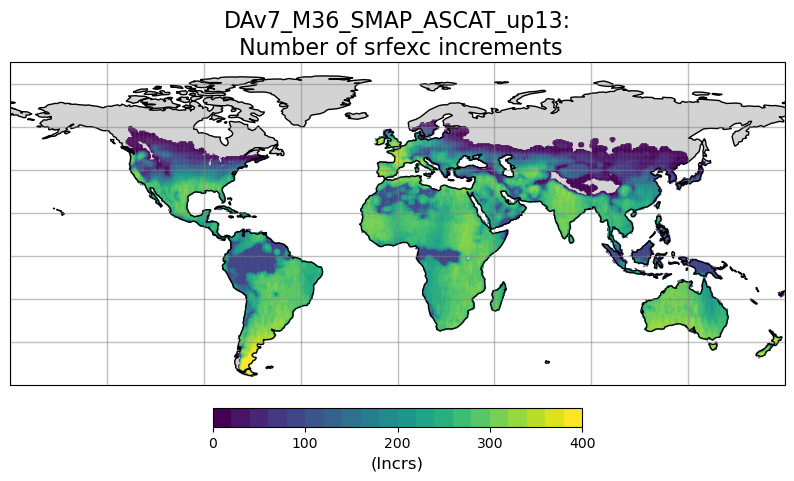

In [71]:
expt_name2 = 'DAv7_M36_SMAP_ASCAT_up13'
data = np.load(f'{expt_name2}_{start_date_str}_{end_date_str}_catch_progn_incr_stats_v2.npz')

ex2_number_of_incr      = data['number_of_incr']
ex2_std_sfexc_increment = data['ts_std_surfexc_incr']
ex2_std_rzexc_increment = data['ts_std_rzexc_incr']
ex2_std_total_increment = data['ts_std_total_incr']

obarray = np.empty([n_tile, 3])
obarray.fill(np.nan)
obarray[:, 1] = lon
obarray[:, 2] = lat

obarray[:, 0] = ex2_number_of_incr
obarray[:, 0][obarray[:, 0] == 0] = np.nan
plot_global_tight(obarray,False,f'{expt_name2}:\n Number of srfexc increments','(Incrs)', 0, 400) 

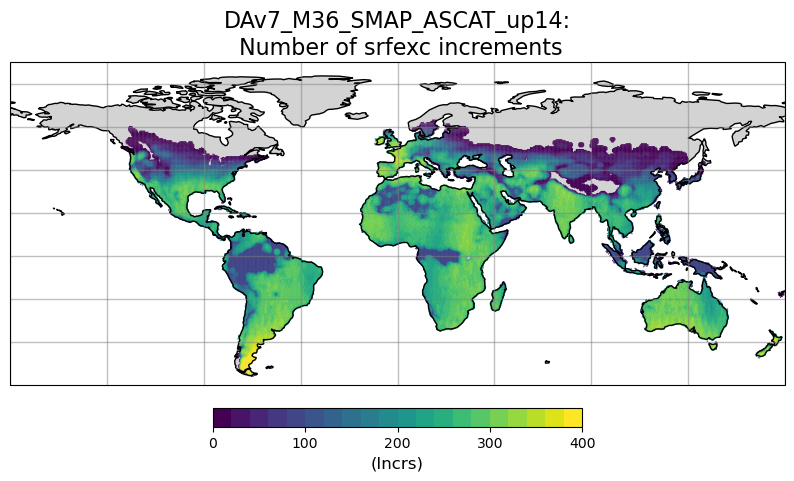

In [65]:
expt_name3 = 'DAv7_M36_SMAP_ASCAT_up14'
data = np.load(f'{expt_name3}_{start_date_str}_{end_date_str}_catch_progn_incr_stats_v2.npz')

ex3_number_of_incr      = data['number_of_incr']
ex3_std_sfexc_increment = data['ts_std_surfexc_incr']
ex3_std_rzexc_increment = data['ts_std_rzexc_incr']
ex3_std_total_increment = data['ts_std_total_incr']

obarray = np.empty([n_tile, 3])
obarray.fill(np.nan)
obarray[:, 1] = lon
obarray[:, 2] = lat

obarray[:, 0] = ex3_number_of_incr
obarray[:, 0][obarray[:, 0] == 0] = np.nan
plot_global_tight(obarray,False,f'{expt_name3}:\n Number of srfexc increments','(Incrs)', 0, 400) 

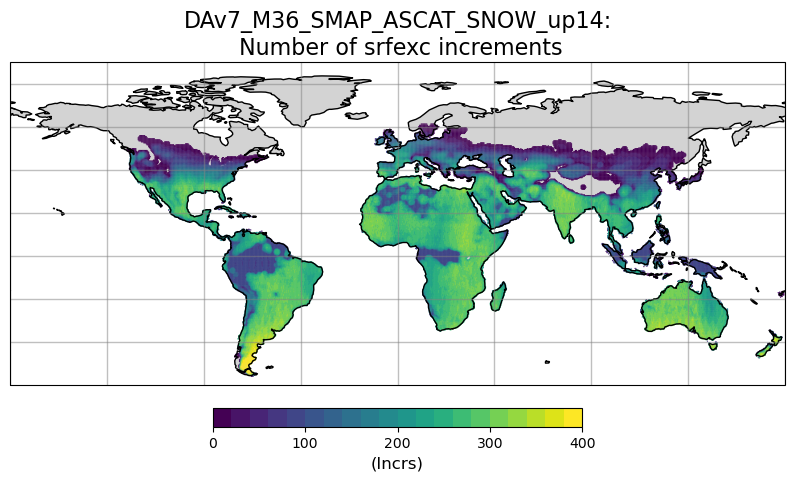

In [66]:
expt_name4 = 'DAv7_M36_SMAP_ASCAT_SNOW_up14'
data = np.load(f'{expt_name4}_{start_date_str}_{end_date_str}_catch_progn_incr_stats_v2.npz')

ex4_number_of_incr      = data['number_of_incr']
ex4_std_sfexc_increment = data['ts_std_surfexc_incr']
ex4_std_rzexc_increment = data['ts_std_rzexc_incr']
ex4_std_total_increment = data['ts_std_total_incr']

obarray = np.empty([n_tile, 3])
obarray.fill(np.nan)
obarray[:, 1] = lon
obarray[:, 2] = lat

obarray[:, 0] = ex4_number_of_incr
obarray[:, 0][obarray[:, 0] == 0] = np.nan
plot_global_tight(obarray,False,f'{expt_name4}:\n Number of srfexc increments','(Incrs)', 0, 400) 

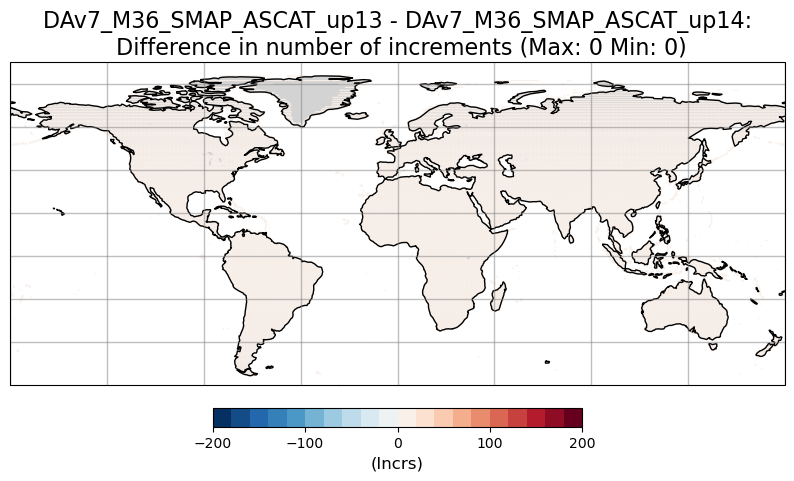

In [73]:
obarray[:, 0] = ex2_number_of_incr - ex3_number_of_incr
maxval = np.max(obarray[:, 0]) 
minval = np.min(obarray[:, 0]) 
plot_global_tight(obarray,False,f'{expt_name2} - {expt_name3}:\n Difference in number of increments (Max: {maxval:.3g} Min: {minval:.3g})','(Incrs)', -200, 200) 

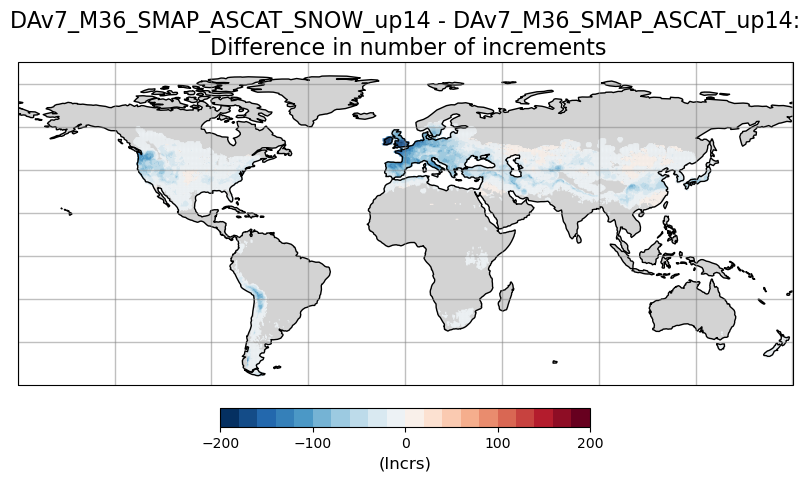

In [67]:
obarray[:, 0] = ex4_number_of_incr - ex3_number_of_incr
obarray[:, 0][obarray[:, 0] == 0] = np.nan
plot_global_tight(obarray,False,f'{expt_name4} - {expt_name3}:\n Difference in number of increments','(Incrs)', -200, 200) 

3.2184250354766846
0.0


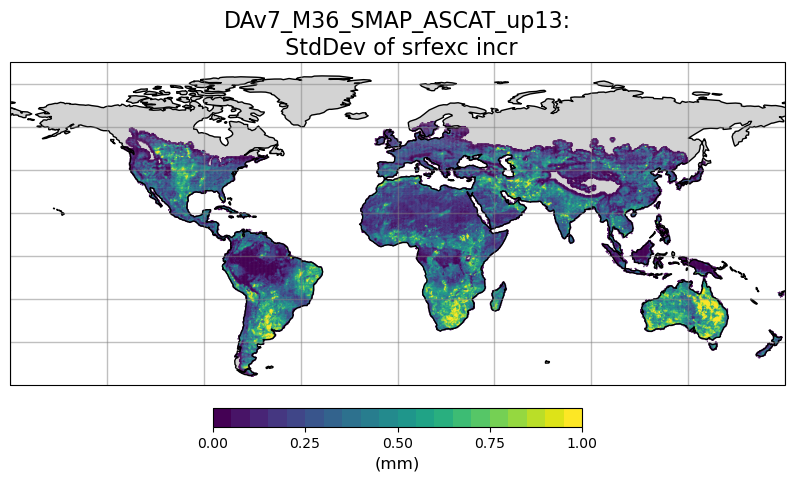

In [76]:
obarray[:, 0] = ex2_std_sfexc_increment
obarray[:, 0][obarray[:, 0] == 0] = np.nan
print(np.nanmax(ex2_std_sfexc_increment))
print(np.nanmin(ex2_std_sfexc_increment))     
plot_global_tight(obarray,False,f'{expt_name2}:\n StdDev of srfexc incr','(mm)', 0, 1) 

3.2184250354766846
0.0


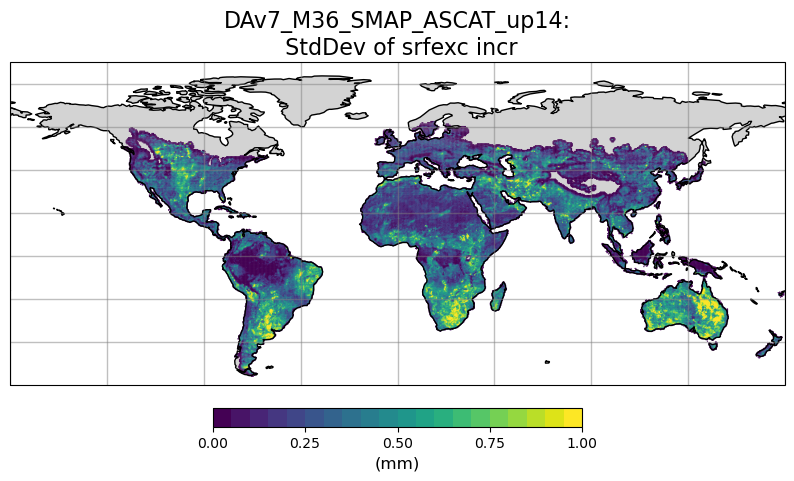

In [68]:
obarray[:, 0] = ex3_std_sfexc_increment
obarray[:, 0][obarray[:, 0] == 0] = np.nan
print(np.nanmax(ex3_std_sfexc_increment))
print(np.nanmin(ex3_std_sfexc_increment))     
plot_global_tight(obarray,False,f'{expt_name3}:\n StdDev of srfexc incr','(mm)', 0, 1) 

3.5894289016723633
0.0


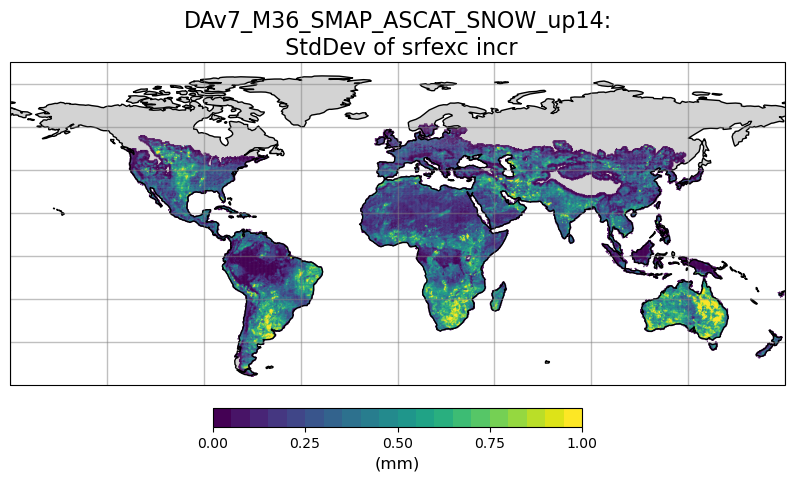

In [69]:
obarray[:, 0] = ex4_std_sfexc_increment
obarray[:, 0][obarray[:, 0] == 0] = np.nan
print(np.nanmax(ex4_std_sfexc_increment))
print(np.nanmin(ex4_std_sfexc_increment))     
plot_global_tight(obarray,False,f'{expt_name4}:\n StdDev of srfexc incr','(mm)', 0, 1) 

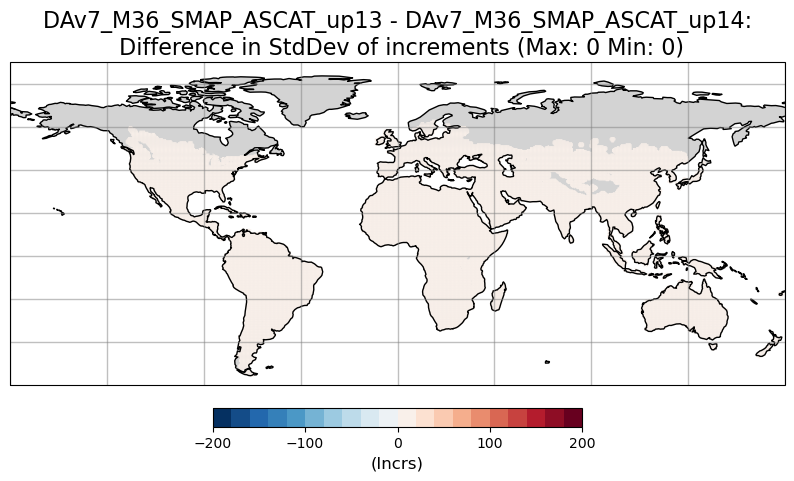

In [75]:
obarray[:, 0] = ex2_std_sfexc_increment - ex3_std_sfexc_increment
maxval = np.nanmax(obarray[:, 0]) 
minval = np.nanmin(obarray[:, 0]) 
plot_global_tight(obarray,False,f'{expt_name2} - {expt_name3}:\n Difference in StdDev of increments (Max: {maxval:.3g} Min: {minval:.3g})','(Incrs)', -200, 200) 

0.7513435781002045
-1.0419576242566109


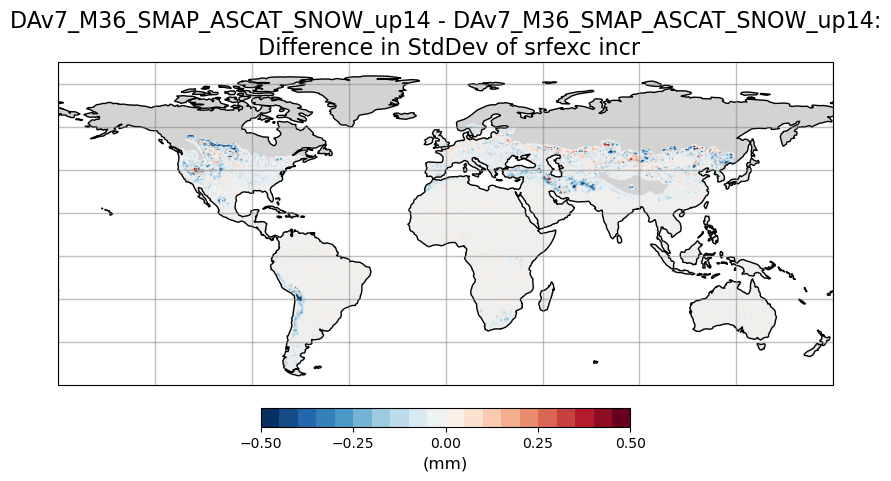

In [70]:
obarray[:, 0] = ex4_std_sfexc_increment - ex3_std_sfexc_increment
obarray[:, 0][obarray[:, 0] == 0] = np.nan
print(np.nanmax(ex4_std_sfexc_increment - ex3_std_sfexc_increment))
print(np.nanmin(ex4_std_sfexc_increment - ex3_std_sfexc_increment))     
plot_global_tight(obarray,False,f'{expt_name4} - {expt_name4}:\n Difference in StdDev of srfexc incr','(mm)', -0.5, 0.5) 

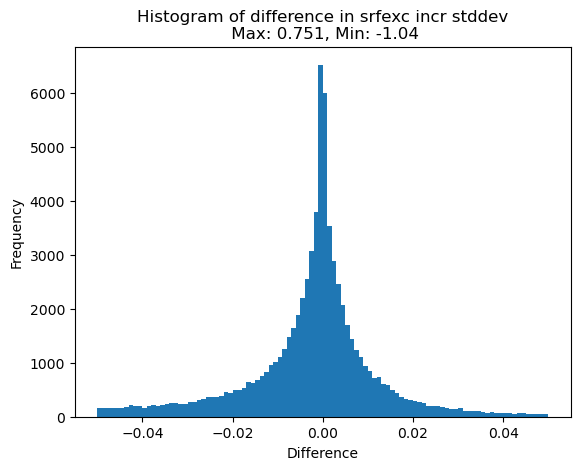

In [60]:
# Make histogram of the difference array
maxdiff = np.nanmax(ex4_std_sfexc_increment - ex3_std_sfexc_increment)
mindiff = np.nanmin(ex4_std_sfexc_increment - ex3_std_sfexc_increment)

plt.hist(obarray[:, 0], bins=100, range=(-0.05, 0.05))
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title(f'Histogram of difference in srfexc incr stddev\n Max: {maxdiff:.3g}, Min: {mindiff:.3g}')
plt.show()